# Корреляционный анализ

## Задача 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
milk = np.array([[13, 35, 26, 46], [22, 45, 48, 75], [18, 30, 15, 47], [44, 62, 56, 68]])

In [3]:
print(milk)

[[13 35 26 46]
 [22 45 48 75]
 [18 30 15 47]
 [44 62 56 68]]


Воспользуемся критерием хи-квадрат, однако сначала проверим, можем ли применять его в данном случае.

In [4]:
chi2, p, dof, ex = sps.chi2_contingency(milk)

In [5]:
print(ex)

[[17.90769231 31.75384615 26.76923077 43.56923077]
 [28.35384615 50.27692308 42.38461538 68.98461538]
 [16.41538462 29.10769231 24.53846154 39.93846154]
 [34.32307692 60.86153846 51.30769231 83.50769231]]


Заметим, что здесь вообще нет значений меньше 5, поэтому можем применять критерий хи-квадрат (достаточно, чтобы это выполнялось для 80%). 

In [6]:
print(p)

0.06133904461935207


То есть на уровне значимости 0.05 мы принимаем гипотезу о независимости.

## Задача 2

In [7]:
data = np.load('hw5t2b.npy')

In [8]:
X = data[:, 0]
Y = data[:, 1]

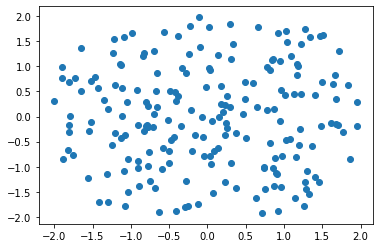

In [9]:
plt.scatter(X, Y)
plt.show()

Выборки не очень похожи на зависимые, но проверим это с помощью коэффициентов корреляции.

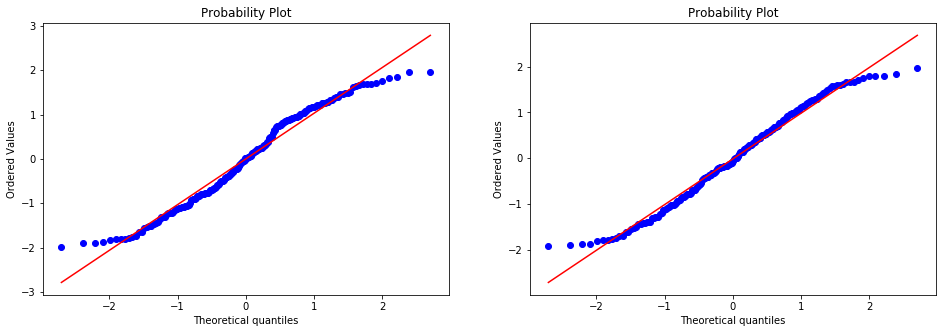

In [10]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sps.probplot(X, plot=plt)
plt.subplot(1, 2, 2)
sps.probplot(Y, plot=plt)
plt.show()

Хвосты распределений X и Y легче, чем у нормального, однако всё-таки посмотрим на все три коэффициента корреляции.

In [11]:
rho, pval_sp = sps.spearmanr(X, Y)
r, pval_p = sps.pearsonr(X, Y)
tau, pval_k = sps.kendalltau(X, Y)

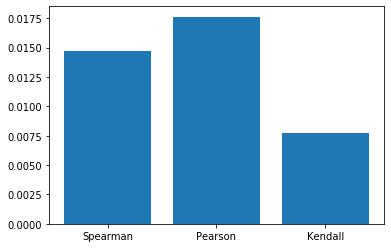

In [12]:
plt.bar([1, 2, 3], [rho, r, tau])
plt.xticks([1, 2, 3], ['Spearman', 'Pearson', 'Kendall'])
plt.show()

In [13]:
print("p-value for spearman: {}".format(pval_sp))
print("p-value for pearson: {}".format(pval_p))
print("p-value for kendall: {}".format(pval_k))

p-value for spearman: 0.8361884433241937
p-value for pearson: 0.8042730872520079
p-value for kendall: 0.870725035513317


Исходя из полученных результатов, пожалуй, можем принять гипотезу о независимости выборок на уровне значимости 0.05.

## Задача 3

In [14]:
data = np.load('hw5t3.npy')

In [15]:
heros = data[:, 0]
time = np.array(data[:,1], dtype=float)

In [16]:
print(np.unique(heros))

['Bandersnatch' 'Humpty-Dumpty' 'Mr. Fattakhov'
 'Tweedledee and Tweedledum']


Для начала посмотрим на наши данные.

In [17]:
import seaborn as sns

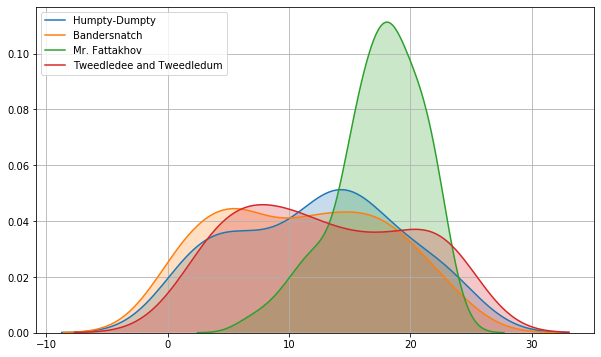

In [18]:
plt.figure(figsize = (10, 6))
sns.kdeplot(time[heros == 'Humpty-Dumpty'], label = 'Humpty-Dumpty', shade=True)
sns.kdeplot(time[heros == 'Bandersnatch'], label = 'Bandersnatch', shade=True)
sns.kdeplot(time[heros == 'Mr. Fattakhov'], label = 'Mr. Fattakhov', shade=True)
sns.kdeplot(time[heros == 'Tweedledee and Tweedledum'], label = 'Tweedledee and Tweedledum', shade=True)
plt.grid()

Визуально наблюдается зависимость между временем и тем, кто наливает новую кружку.

Так как время - величина непрерывная, поделим её на несколько интервалов, чтобы было проще рассмотреть зависимость двух категориальных признаков. Также закодируем имена героев числами.

In [19]:
heros[heros =='Humpty-Dumpty'] = 0
heros[heros =='Bandersnatch'] = 1
heros[heros == 'Mr. Fattakhov'] = 2
heros[heros == 'Tweedledee and Tweedledum'] = 3
heros = np.array(heros, dtype=int)
hist = np.histogram2d(heros, time, bins=(4, 6))
print(hist)

(array([[16., 23., 15., 13., 19., 11.],
       [14., 10.,  9., 20., 10., 12.],
       [ 0.,  2., 11., 34., 68., 39.],
       [ 6., 17., 15.,  8., 10., 18.]]), array([0.  , 0.75, 1.5 , 2.25, 3.  ]), array([ 0.10018754,  4.08215942,  8.0641313 , 12.04610318, 16.02807506,
       20.01004694, 23.99201882]))


Теперь воспользуемся критерием хи-квадрат, предварительно проверив, можем ли мы его применять.

In [20]:
chi2, p, dof, ex = sps.chi2_contingency(hist[0])

In [21]:
ex

array([[ 8.73  , 12.61  , 12.125 , 18.1875, 25.9475, 19.4   ],
       [ 6.75  ,  9.75  ,  9.375 , 14.0625, 20.0625, 15.    ],
       [13.86  , 20.02  , 19.25  , 28.875 , 41.195 , 30.8   ],
       [ 6.66  ,  9.62  ,  9.25  , 13.875 , 19.795 , 14.8   ]])

In [22]:
ex[ex < 5].shape[0] / np.prod(ex.shape)

0.0

В данном случае можем применять критерий. Если же делить время на большее количество частей, там начинают появляться значения меньше пяти и, начиная с 11 частей, мы уже не сможем применять критерий хи-квадрат (< 5 для 20,4% случаев).

In [23]:
p

1.8302604850685124e-16

Также воспользуемся тестом Краскала-Уоллиса, который можно применять для проверки корреляции между непрерывным и категориальным признаком.

In [32]:
sps.kruskal(people, time)

KruskalResult(statistic=522.8510642185358, pvalue=1.0145147060212064e-115)

Полученные результаты говорят нам о том, что мы отвергаем гипотезу о независимости выборок на уровне значимости 0.05.

## Задача 4

In [25]:
data = np.load('hw5t4.npy')

In [26]:
data.shape

(10, 100)

Для начала посмотрим на ранговый коэффициент конкордации Кендалла, чтобы оценить общую корреляцию выборок между собой.

In [27]:
k = 10
n = 100
W = 12 / (k**2 * (n**3 - n)) * np.sum((data.argsort(axis=1).sum(axis=0) - k * (n + 1) / 2)**2)
print(W)

0.08104818481848185


Значение получилось довольно маленьким. Посмотрим на попарную корреляцию выборок.

In [28]:
pvals = []
ind = []
for i in range(10):
    for j in range(i + 1, 10):
        pvals.append(sps.spearmanr(data[i], data[j])[1])
        ind.append((i, j))

Воспользуемся методом Холма, контролирующим FWER на уровне значимости 0.05.

In [29]:
from statsmodels.stats.multitest import multipletests

In [30]:
result = multipletests(pvals, alpha=0.05, method='holm')[0]

In [31]:
for res, index in zip(result, ind):
    if res:
        print(index)

(1, 8)


Таким образом, только для выборок с индексами 1 и 8, мы отвергаем гипотезу о независимости.